In [1]:
%pip install opencv-python scikit-image scipy pillow matplotlib imageio

Note: you may need to restart the kernel to use updated packages.


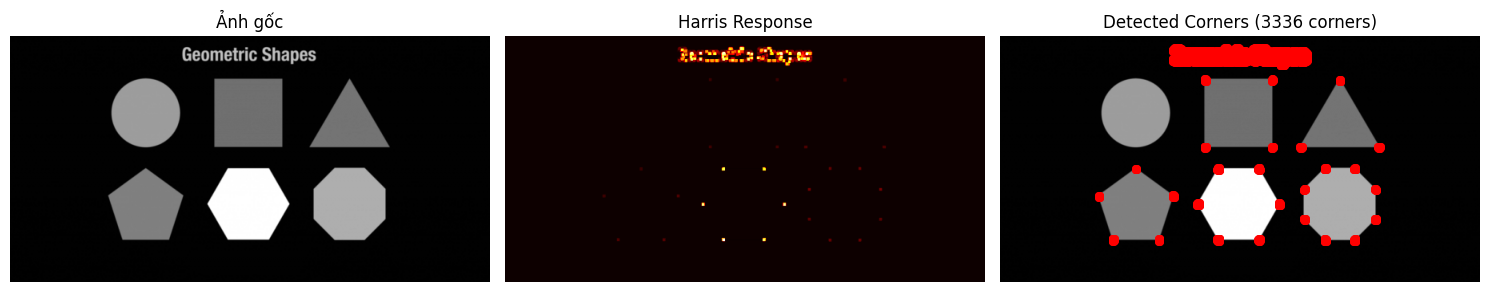

Số góc được phát hiện: 3336


In [2]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đọc và chuyển đổi ảnh sang grayscale
img = Image.open('geometric.png').convert('L')
data = np.array(img)

# Phát hiện góc Harris
gray = np.float32(data)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.001)

# Làm nổi bật các góc
dst = cv2.dilate(dst, None)

# Lấy tọa độ các góc
coords = np.where(dst > 0.01 * dst.max())
coords = list(zip(coords[1], coords[0]))

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(data, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dst, cmap='hot')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(data, cmap='gray')
plt.plot([p[0] for p in coords], [p[1] for p in coords], 'r.', markersize=8)
plt.title(f'Detected Corners ({len(coords)} corners)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Số góc được phát hiện: {len(coords)}')